In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import h5py

from plot import PlotAx, STYLE_PATH
from data_loader import LoaderCrisL1

%matplotlib inline

/home/cali/bin/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### 加载训练数据

X：测量通道radiance

Y：预测通道radiance

In [58]:
in_dir = '/home/cali/data/GapFilling/CRISFull/'
filenames = os.listdir(in_dir)
in_files = [os.path.join(in_dir, filename) for filename in filenames]
in_files.sort()

ranges_X = [(650., 1095.), (1210., 1750.), (2155., 2550.)]
ranges_Y = [(1095.625, 1209.375), (1750.625, 2154.375), (2550.625, 2755.)]

# ranges_X = [(650., 1095), ]
# ranges_Y = [(1095.625, 1209.375), ]

# ranges_X = [(1210., 1750), ]
# ranges_Y = [(1750.625, 2154.375), ]

# ranges_X = [(2155., 2550.)]
# ranges_Y = [(2550., 2755.)]


def get_mea(train_X, val_X, train_Y, val_Y):
    lin_reg = LinearRegression(normalize=False)
    lin_reg.fit(train_X, train_Y)
    val_predictions = lin_reg.predict(val_X)

    mae = mean_absolute_error(val_Y, val_predictions)
    return mae

from util import get_cris_full_train_data, get_range_index
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>


50
10000 0.03339935728815196
20000 0.0364926706494291
50000 0.0366450166712274
100000 0.03829256522515851
200000 0.038852325242932396

100
10000 0.033214038916002
20000 0.03607252456036557
50000 0.03616786325611213
100000 0.03759577875796017
200000 0.0374291119854703

200
10000 0.033111395809345474
20000 0.03574024185039144
50000 0.03585751310801839
100000 0.03699113954917847
200000 0.03657577000528186

300
10000 0.03270657011395746
20000 0.03491805039006515
50000 0.03517728677073336
100000 0.035964611785042226
200000 0.035950390687366045

400
10000 0.03200848874893326
20000 0.03417784693816667
50000 0.034082698545704115
100000 0.035077086243938876
200000 0.035392815882463645

500
10000 0.0313891078802875
20000 0.032667838919565026
50000 0.032801935252872005
100000 0.033769780188118
200000 0.033957367901853726

600
10000 0.030545631807257608
20000 0.03200014798007484
50000 0.032012796876035206
100000 0.03282067363596962
200000 0.03294367668846894


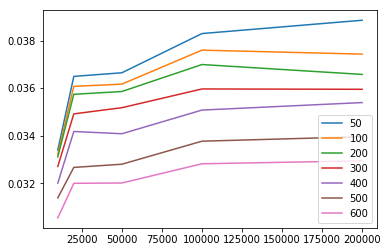

In [59]:
for n in [50, 100, 200, 300, 400, 500, 600]:
    pca = PCA(n)
    print()
    print(n)
    x = [10000, 20000, 50000, 100000, 200000]
    y = []
    for count in [10000, 20000, 50000, 100000, 200000]:
        X, Y = get_cris_full_train_data(in_files, x_ranges=ranges_X, y_ranges=ranges_Y, count=count)
        pca.fit(X)
        train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 42)
        train_X = pca.transform(train_X)
        val_X = pca.transform(val_X)
        mae = get_mea(train_X, val_X, train_Y, val_Y)
        y.append(mae)
        print(count, mae)
    plt.plot(x, y, label=str(n))
    plt.legend()

In [99]:
# 制作绘图用的X轴数据
wavenumber_X = []
for s, e in ranges_X:
    wavenumber_X = np.append(wavenumber_X, np.arange(s, e + 0.625, 0.625))

wavenumber_Y = []
for s, e in ranges_Y:
    wavenumber_Y = np.append(wavenumber_Y, np.arange(s, e + 0.625, 0.625))

# 制作绘图用的X轴数据的index
from util import get_range_index
index_X = get_range_index(ranges_X, step=0.625)
index_Y = get_range_index(ranges_Y, step=0.625)
print(index_X)
print(index_Y)

[[0, 713], [713, 1578], [1578, 2211]]
[[0, 183], [183, 830], [830, 1158]]


In [85]:
in_file_cris = '/home/cali/download/GCRSO-SCRIF-SCRIS_npp_d20181220_t0425039_e0433017_b37026_c20181221004838207043_noac_ops.h5'
print(os.path.isfile(in_file_cris))
from data_loader import LoaderCrisL1
data = LoaderCrisL1(in_file_cris)
lw, mw, sw = data.get_spectrum_radiance()
response = np.concatenate((lw, mw, sw), axis=3)

True


In [88]:
response.shape

(60, 30, 9, 2211)

In [96]:
s_cris = response[0, 0, 0]
s_cris = s_cris.reshape(1, -1)

In [94]:
X, Y = get_cris_full_train_data(in_files, x_ranges=ranges_X, y_ranges=ranges_Y)
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 42)
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
val_cris = lin_reg.predict(s_cris)

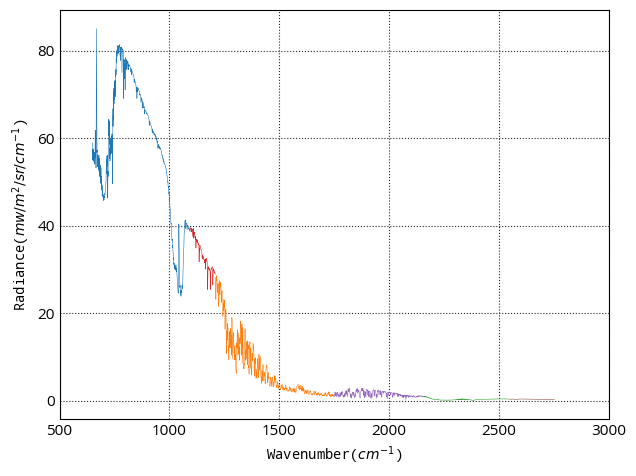

In [103]:
format_kwargs = {
        'x_axis_min': 500,
        'x_axis_max': 3000,
        'x_interval': 500,
        'x_label': 'Wavenumber($cm^{-1}$)',

#         'y_axis_min': 0,
#         'y_axis_max': 120,
#         'y_interval': 30,
        'y_label': 'Radiance($mw/m^2/sr/cm^{-1}$)'

    }

plot_kwargs = {
    'lw': 0.4
}

out_file = 'pic/cris_gap_filling.png'

if format_kwargs is None:
    format_kwargs = {}
style_path = STYLE_PATH
style_file = os.path.join(style_path, 'plot_regression.mplstyle')
plt.style.use(style_file)
fig_size = (6.4, 4.8)
dpi = 100
fig = plt.figure(figsize=fig_size, dpi=dpi)

plot_ax = PlotAx()
ax1 = plt.subplot2grid((1, 1), (0, 0))

for s, e in index_X:
    ax1.plot(wavenumber_X[s:e], s_cris[0, s:e], **plot_kwargs)

for s, e in index_Y:
    ax1.plot(wavenumber_Y[s:e], val_cris[0, s:e], **plot_kwargs)

# ##### 格式化图片
if format_kwargs is None:
    format_kwargs = dict()
plot_ax.format_ax(ax1, **format_kwargs)
plt.tight_layout()
# ##### 保存图片
fig.savefig(out_file, dpi=dpi)
fig.show()